# Create inputs and targets

In [45]:
import numpy as np
import torch

data = np.array([
    [0.1, 0.2],
    [0.4, 0.6],
    [0.5, 0.9],
    [0.7, 0.8]
], dtype=np.float32)

labels = np.array([[0], [0], [1], [1]], dtype=np.float32)

inputs = torch.tensor(data)
targets = torch.tensor(labels)

# Create model

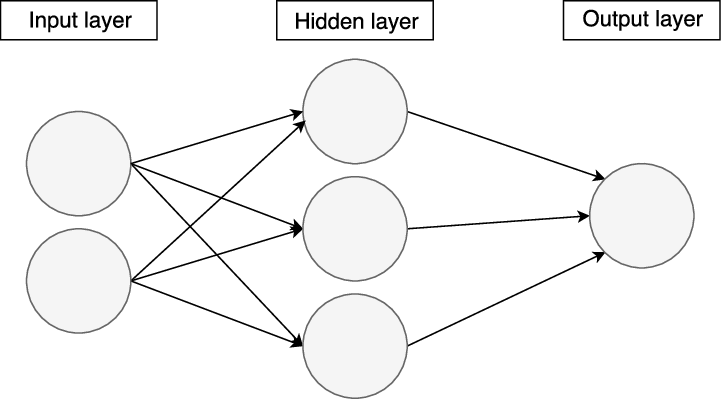

In [46]:
# random_seed for reproducability
RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

# Hidden layer 1
W1 = torch.randn((2, 3))
b1 = torch.zeros((3))
# Output layer
W2 = torch.randn((3, 1))
b2 = torch.zeros((1))

params = [W1, b1, W2, b2]

print(f'{W1, W1.shape=}\n')
print(f'{b1, b1.shape=}\n')
print(f'{W2, W2.shape=}\n')
print(f'{b2, b2.shape=}')

W1, W1.shape=(tensor([[ 0.3367,  0.1288,  0.2345],
        [ 0.2303, -1.1229, -0.1863]]), torch.Size([2, 3]))

b1, b1.shape=(tensor([0., 0., 0.]), torch.Size([3]))

W2, W2.shape=(tensor([[ 2.2082],
        [-0.6380],
        [ 0.4617]]), torch.Size([3, 1]))

b2, b2.shape=(tensor([0.]), torch.Size([1]))


In [47]:
for param in params:
    param.requires_grad = True

np.set_printoptions(suppress=True)
torch.set_printoptions(sci_mode=False)

epochs = 1000
loss_i = []
with torch.no_grad():
    for epoch in range(epochs):

        # Forward pass
        # Hidden layer 1
        Z1 = torch.matmul(inputs, W1) + b1
        # print(f'{Z1, Z1.shape=}')
        A1 = torch.relu(Z1)
        # print(f'{A1, A1.shape=}')
        # Output layer
        Z2 = torch.matmul(A1, W2) + b2
        # print(f'{Z2, Z2.shape=}')
        A2 = torch.sigmoid(Z2)
        # print(f'{A2, A2.shape=}')
        loss = 0.5*(targets - A2).pow(2).sum()
        # print(f'{loss, loss.shape=}')
        loss_i.append(loss.item())

        # Backward pass
        dA2 = A2 - targets
        # print(f'{dA2, dA2.shape=}')
        dZ2 = dA2 * (A2 * (1 - A2))
        # print(f'{dZ2, dZ2.shape=}')
        dW2 = torch.matmul(A1.T, dZ2)
        # print(f'{dW2, dW2.shape=}')
        db2 = torch.sum(dZ2, dim=0)
        # print(f'{db2, db2.shape=}')
        dA1 = torch.matmul(dZ2, W2.T)
        # print(f'{dA1, dA1.shape=}')
        dZ1 = dA1 * (Z1 > 0).float()
        # print(f'{dZ1, dZ1.shape=}')
        dW1 = torch.matmul(inputs.T, dZ1)
        # print(f'{dW1, dW1.shape=}')
        db1 = torch.sum(dZ1, dim=0)
        # print(f'{db1, db1.shape=}')

        grads = [dW1, db1, dW2, db2]
        for param, grad in zip(params, grads):
            param.data -= 0.1 * grad

        if epoch % 100 == 0:
            print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}')

Epoch 1/1000, Loss: 0.4426
Epoch 101/1000, Loss: 0.2481
Epoch 201/1000, Loss: 0.1587
Epoch 301/1000, Loss: 0.0998
Epoch 401/1000, Loss: 0.0642
Epoch 501/1000, Loss: 0.0435
Epoch 601/1000, Loss: 0.0313
Epoch 701/1000, Loss: 0.0236
Epoch 801/1000, Loss: 0.0186
Epoch 901/1000, Loss: 0.0152


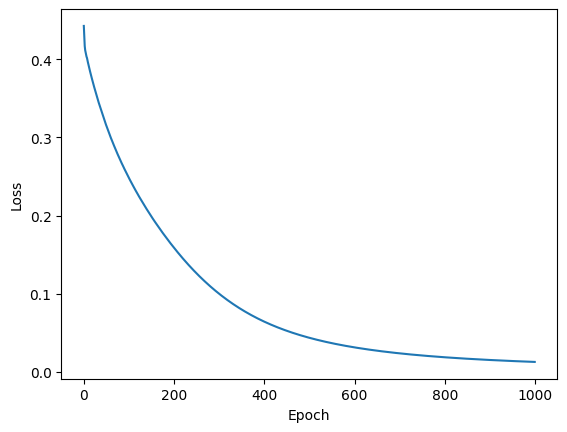

In [48]:
import matplotlib.pyplot as plt

plt.plot(loss_i)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()